### packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [2]:
df= pd.read_csv('ckd_detection.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(1001, 26)

In [4]:
df.drop('id', axis = 1, inplace = True)

In [5]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [6]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      982 non-null    float64
 1   blood_pressure           975 non-null    float64
 2   specific_gravity         902 non-null    float64
 3   albumin                  904 non-null    float64
 4   sugar                    898 non-null    float64
 5   red_blood_cells          687 non-null    object 
 6   pus_cell                 861 non-null    object 
 7   pus_cell_clumps          989 non-null    object 
 8   bacteria                 989 non-null    object 
 9   blood_glucose_random     906 non-null    float64
 10  blood_urea               956 non-null    float64
 11  serum_creatinine         962 non-null    float64
 12  sodium                   821 non-null    float64
 13  potassium                819 non-null    float64
 14  haemoglobin             

In [8]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,982.000000,975.000000,902.000000,904.000000,898.000000,906.000000,956.000000,962.000000,821.000000,819.000000,890.000000
mean,50.639511,75.435897,1.018525,0.796460,0.351893,139.089404,52.500418,2.621726,138.538368,4.550794,13.117978
std,17.093924,12.959808,0.005603,1.267425,0.988677,72.805832,46.405310,5.197283,9.532457,2.803841,2.869269
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,40.000000,70.000000,1.015000,0.000000,0.000000,98.000000,26.000000,0.800000,135.000000,3.800000,11.100000
50%,53.000000,80.000000,1.020000,0.000000,0.000000,117.000000,40.000000,1.200000,139.000000,4.400000,13.700000
75%,64.000000,80.000000,1.025000,1.000000,0.000000,140.000000,53.000000,2.200000,143.000000,4.900000,15.300000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [9]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      982 non-null    float64
 1   blood_pressure           975 non-null    float64
 2   specific_gravity         902 non-null    float64
 3   albumin                  904 non-null    float64
 4   sugar                    898 non-null    float64
 5   red_blood_cells          687 non-null    object 
 6   pus_cell                 861 non-null    object 
 7   pus_cell_clumps          989 non-null    object 
 8   bacteria                 989 non-null    object 
 9   blood_glucose_random     906 non-null    float64
 10  blood_urea               956 non-null    float64
 11  serum_creatinine         962 non-null    float64
 12  sodium                   821 non-null    float64
 13  potassium                819 non-null    float64
 14  haemoglobin             

In [11]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [12]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [13]:
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [14]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'],errors='coerce')

In [15]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



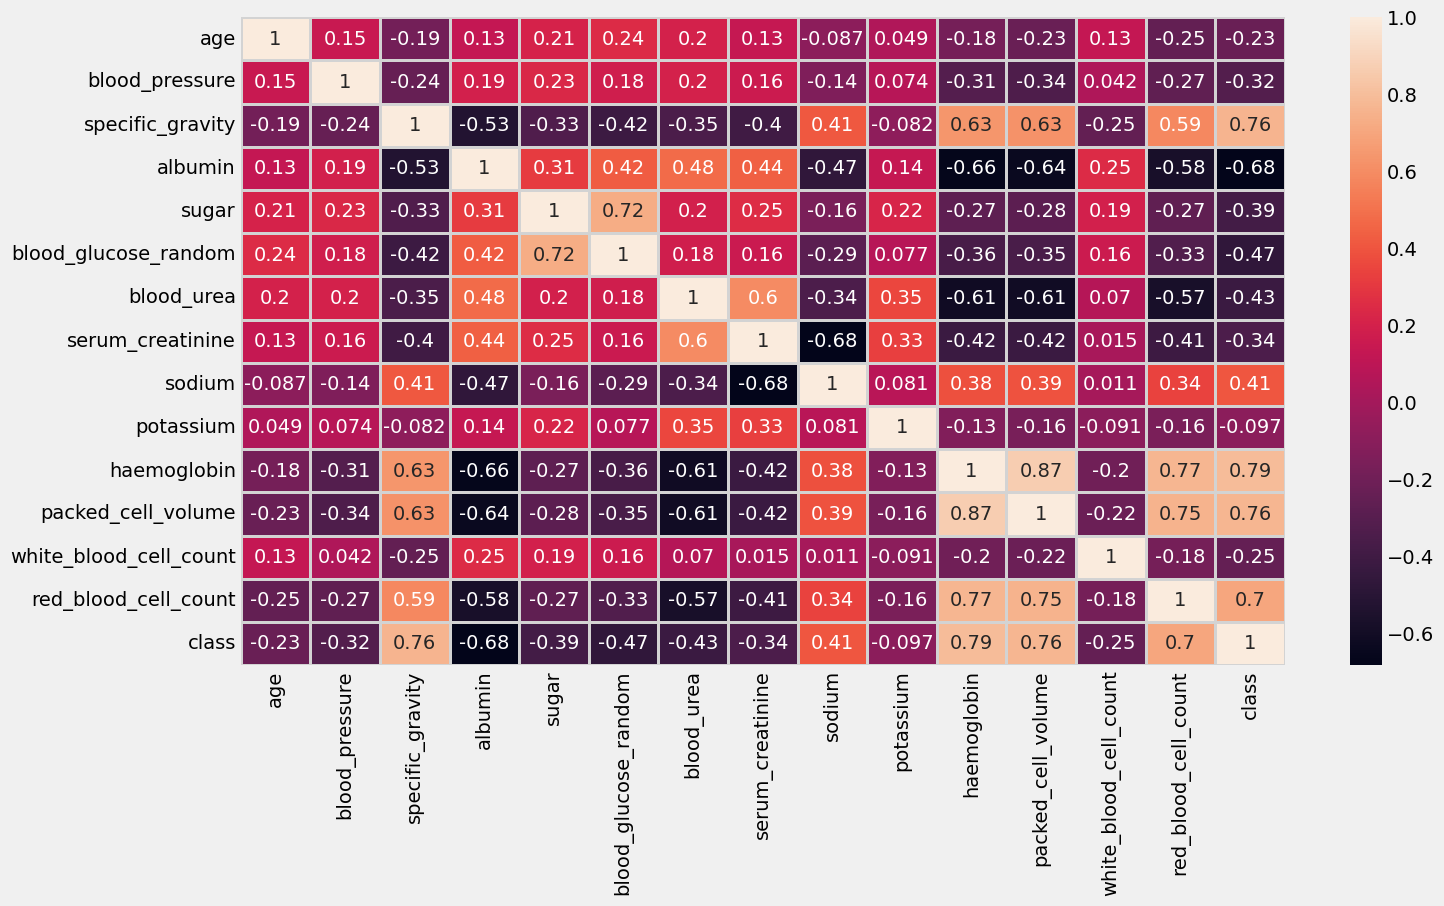

In [16]:
numeric_df = df.select_dtypes(include=['number'])

# Heatmap with numeric data
plt.figure(figsize=(15, 8))
sns.heatmap(numeric_df.corr(), annot=True, linewidths=2, linecolor='lightgrey')
plt.show()


# Exploratory Data Analysis (EDA)


In [17]:
def kde(col):
    grid = sns.FacetGrid(df, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="class", template = 'plotly_dark')
    fig.show()

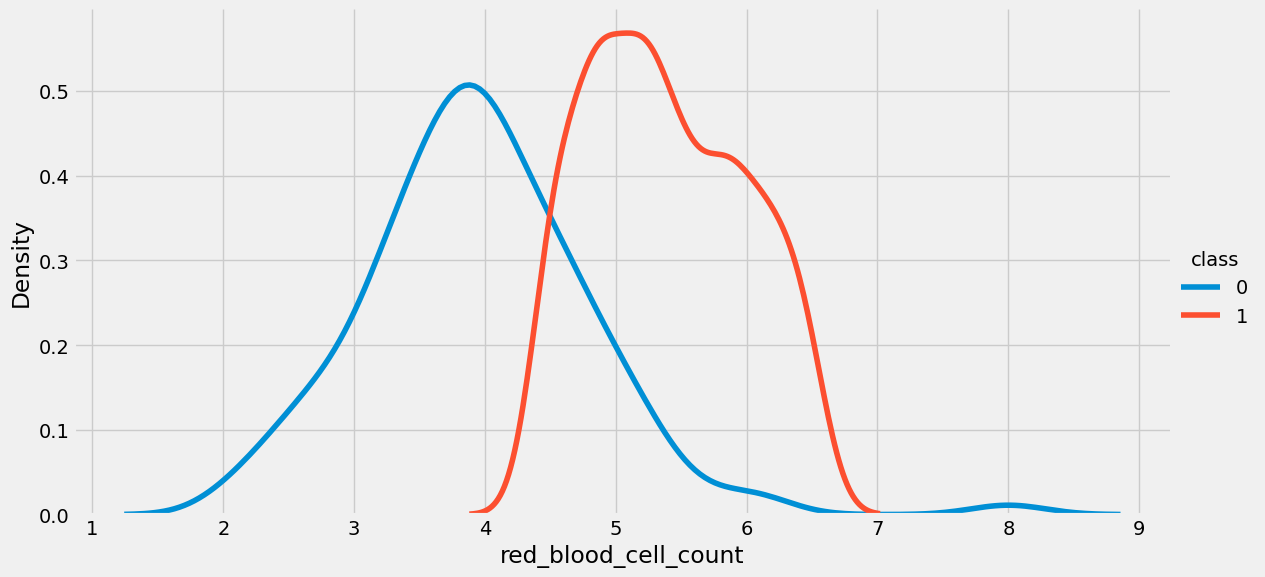

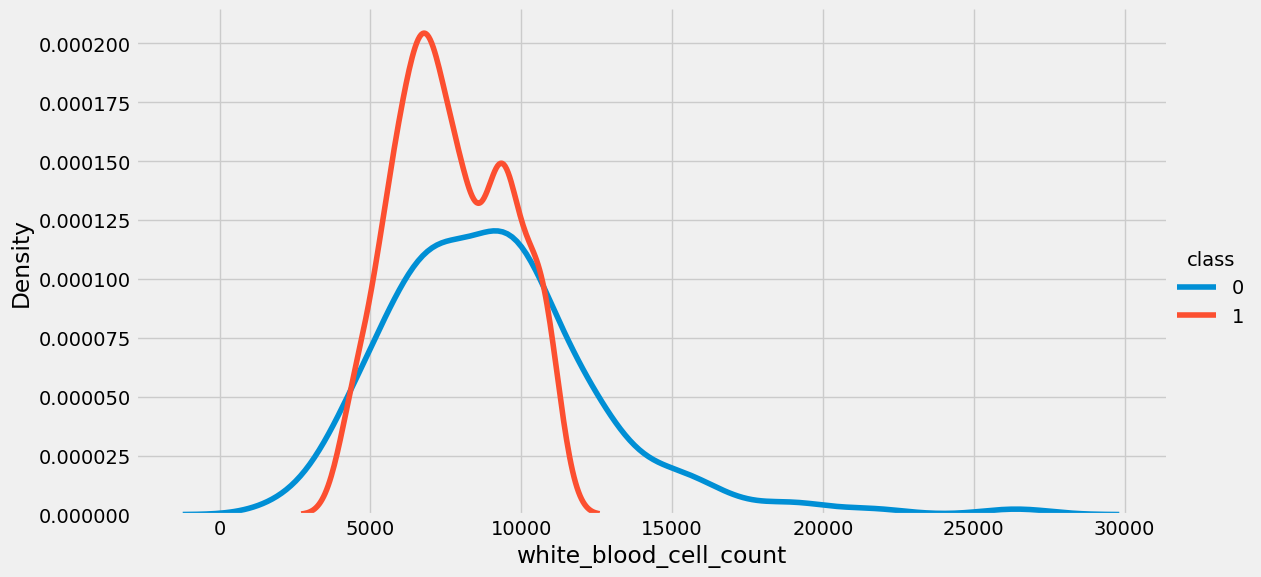

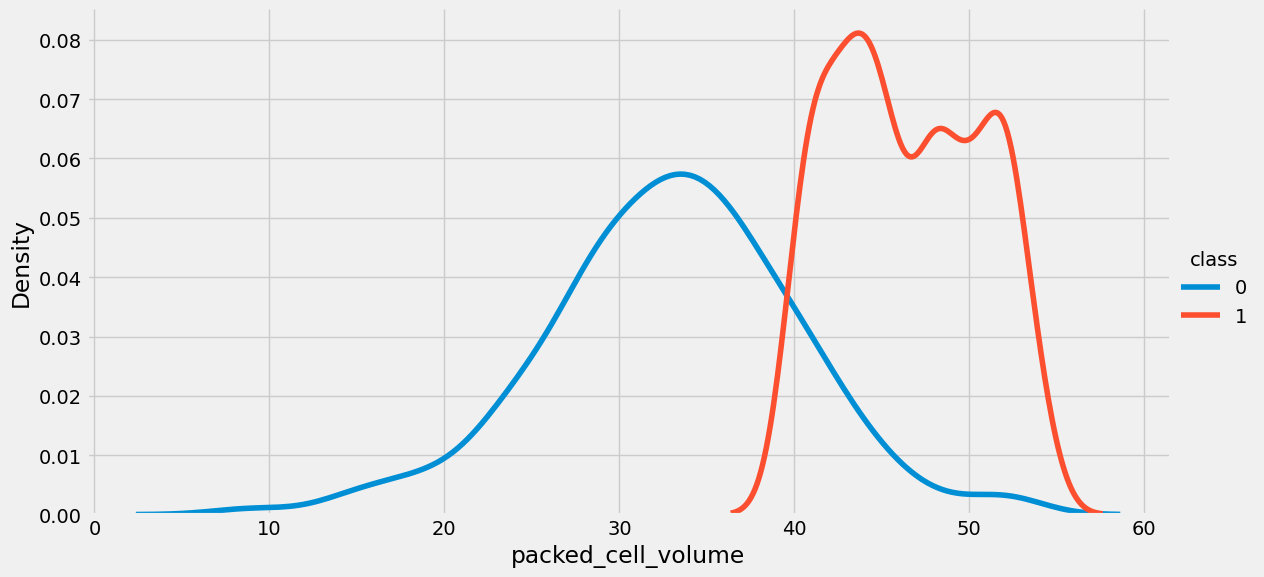

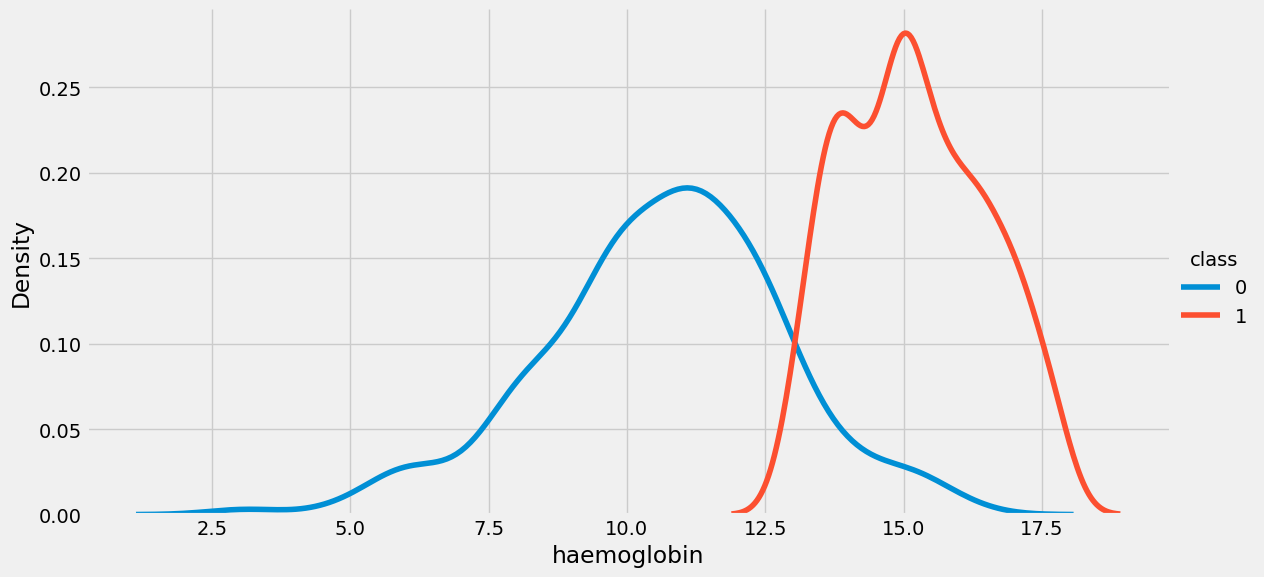

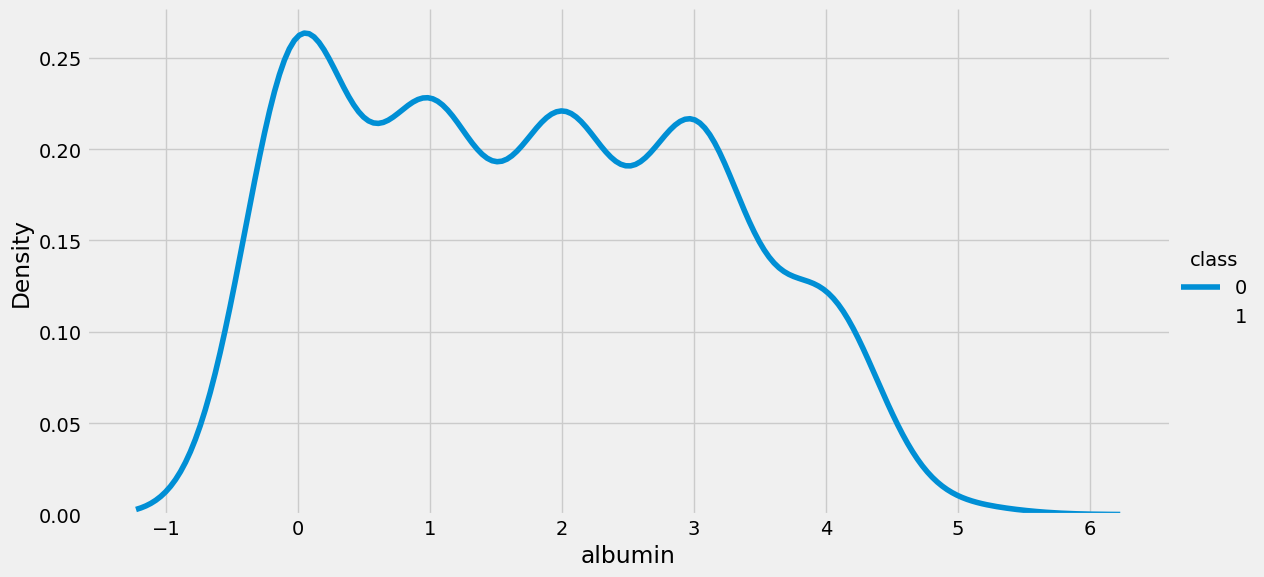

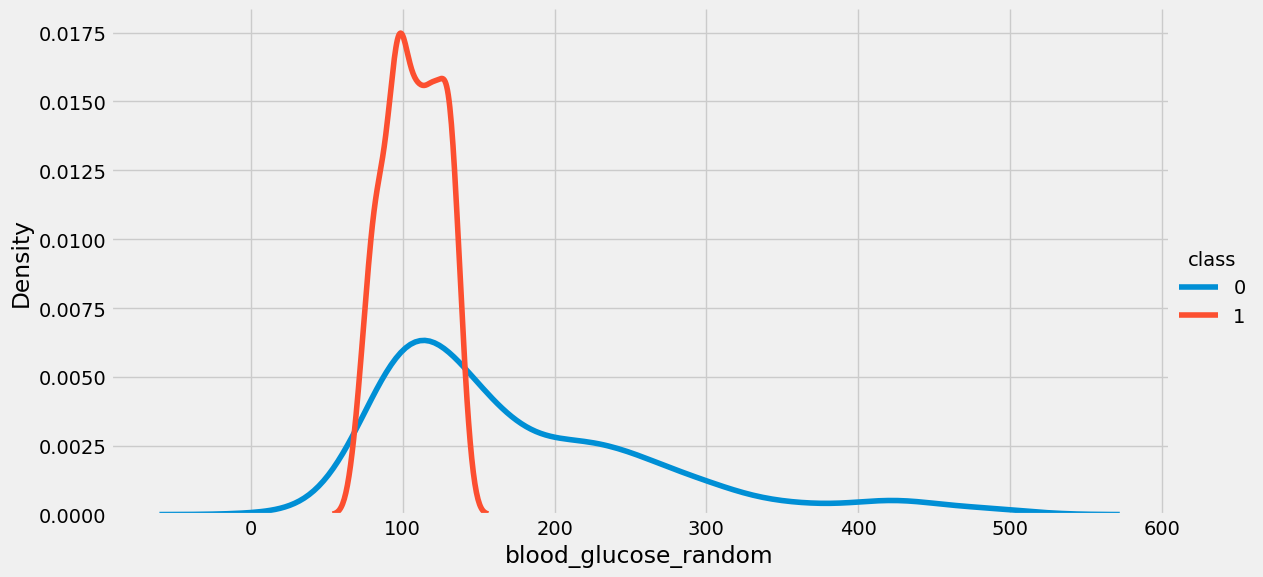

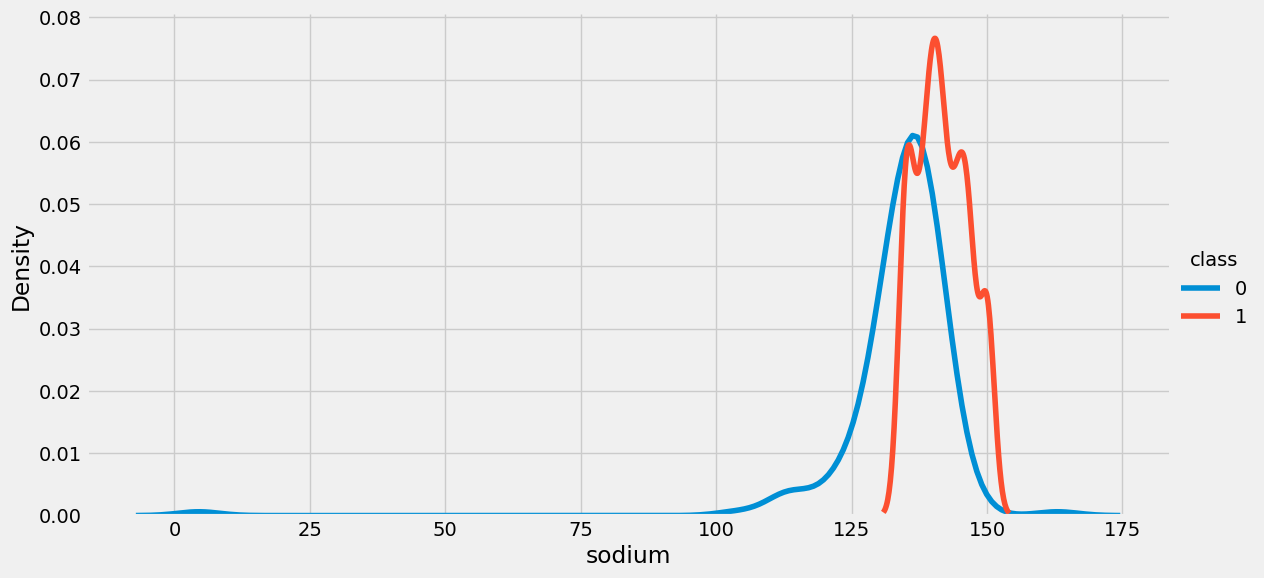

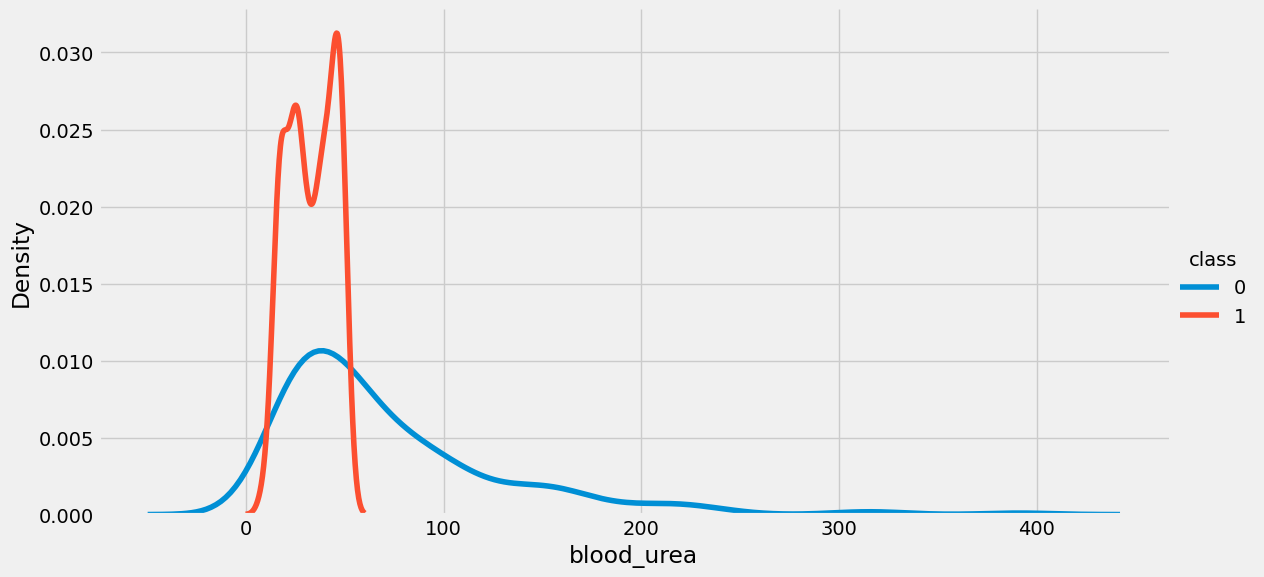

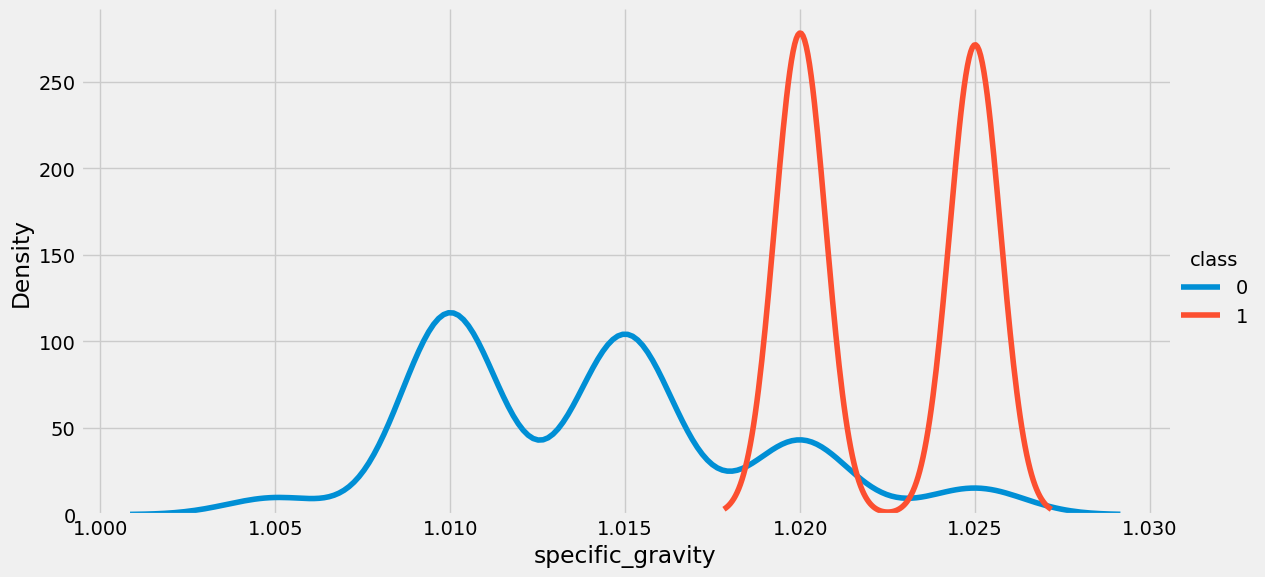

In [18]:
kde('red_blood_cell_count')
kde('white_blood_cell_count')
kde('packed_cell_volume')
kde('haemoglobin')
kde('albumin')
kde('blood_glucose_random')
kde('sodium')
kde('blood_urea')
kde('specific_gravity')


In [19]:
scatter('haemoglobin', 'packed_cell_volume')
scatter('red_blood_cell_count', 'packed_cell_volume')
scatter('blood_urea','packed_cell_volume')
scatter('sugar', 'blood_glucose_random')
scatter('red_blood_cell_count', 'albumin')

In [20]:
px.bar(df, x="blood_pressure", y="packed_cell_volume", color='class', barmode='group', template = 'plotly_dark', height = 400)

px.bar(df, x="blood_pressure", y="haemoglobin", color='class', barmode='group', template = 'plotly_dark', height = 400)

px.bar(df, x="specific_gravity", y="albumin", color='class', barmode='group', template = 'plotly_dark', height = 400)



# Data Pre Processing

In [21]:
df.isna().sum().sort_values(ascending = False)

red_blood_cells            314
red_blood_cell_count       269
white_blood_cell_count     219
potassium                  182
sodium                     180
packed_cell_volume         147
pus_cell                   140
haemoglobin                111
sugar                      103
specific_gravity            99
albumin                     97
blood_glucose_random        95
blood_urea                  45
serum_creatinine            39
blood_pressure              26
age                         19
bacteria                    12
pus_cell_clumps             12
hypertension                 6
diabetes_mellitus            6
coronary_artery_disease      6
appetite                     3
peda_edema                   3
aanemia                      3
class                        0
dtype: int64

In [22]:
df[num_cols].isnull().sum()

age                        19
blood_pressure             26
specific_gravity           99
albumin                    97
sugar                     103
blood_glucose_random       95
blood_urea                 45
serum_creatinine           39
sodium                    180
potassium                 182
haemoglobin               111
packed_cell_volume        147
white_blood_cell_count    219
red_blood_cell_count      269
dtype: int64

In [23]:
df[cat_cols].isnull().sum()

red_blood_cells            314
pus_cell                   140
pus_cell_clumps             12
bacteria                    12
hypertension                 6
diabetes_mellitus            6
coronary_artery_disease      6
appetite                     3
peda_edema                   3
aanemia                      3
class                        0
dtype: int64

In [24]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values


def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [25]:
for col in num_cols:
    random_value_imputation(col)
    

In [26]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [27]:
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [28]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

# Feature Encoding

In [29]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [31]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,132.0,3.5,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,119.0,18.0,0.8,141.0,4.5,11.3,38.0,6000.0,6.5,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,143.0,4.0,9.6,31.0,7500.0,4.6,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,135.0,4.3,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


# Model Building

In [32]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [34]:
y_test.dropna(inplace=True)
y_train.dropna(inplace=True)
y_test.isnull().sum()
y_train.isnull().sum()

np.int64(0)

# Random Forest Classifer

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)



model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       151

    accuracy                           1.00       301
   macro avg       1.00      1.00      1.00       301
weighted avg       1.00      1.00      1.00       301

[[150   0]
 [  0 151]]


# Interactive Input Detecion

In [36]:
def predict_disease(model, input_data):
    input_df = pd.DataFrame([input_data], columns=X.columns)
    
    # Predict the class
    prediction = model.predict(input_df)
    
    # Return human-readable result
    return "CKD Detected" if prediction[0] == 0 else "No CKD Detected"


In [37]:
sample_input = {
    'age': 58,
    'blood_pressure': 80,
    'specific_gravity': 1.020,
    'albumin': 0,
    'sugar': 0,
    'red_blood_cells': 4.35,
    'pus_cell': 0,
    'pus_cell_clumps': 0,
    'bacteria': 0,
    'blood_glucose_random': 131,
    'blood_urea': 18,
    'serum_creatinine': 10.5,
    'sodium': 141,
    'potassium': 3.5,
    'haemoglobin': 10.8,
    'packed_cell_volume': 53,
    'white_blood_cell_count': 6800,
    'red_blood_cell_count': 6.1,
    'hypertension': 0,
    'diabetes_mellitus': 0,
    'coronary_artery_disease': 0,
    'appetite': 0,
    'peda_edema': 0,
    'aanemia': 0
}

# Predict the result
result = predict_disease(model, sample_input)
print("Prediction:", result)


Prediction: CKD Detected


In [39]:
import pickle
with open('RFmodel.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as RFmodel.pkl")

Model saved as RFmodel.pkl
